In [1]:
import pandas as pd
import numpy as np
#import scipy
import math
from scipy.stats import boxcox, boxcox_normmax, skew
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv', index_col ='id', parse_dates=['timestamp'])
test = pd.read_csv('test.csv', index_col ='id', parse_dates=['timestamp'])
y_train = train['price_doc']
train.drop('price_doc', axis = 1, inplace = True)
train_index = train.index
test_index = test.index
macro = pd.read_csv('macro1.csv', parse_dates=['timestamp'])
print(train.shape, test.shape, macro.shape)

(30471, 290) (7662, 290) (2484, 100)


train.head(5)

macro.head(5)

data = pd.concat([train, test])
def print_nan(X):
    counts = X.count()
    length = X.shape[0]
    print('Full length:', length)
    for i in counts[counts < length].index:
        print(i, ': Non NaN num:', counts[i], ', Not NaN:', '%.3f' % (100*counts[i] / length), '%')
    return

print_nan(data)
print_nan(macro)

def p_nan(X):
    counts = X.count()
    length = X.shape[0]
    #print('Full length:', length)
    #print(counts[counts < length].index.values)
    for i in counts[counts < length].index:
        print(i)
        print(macro[i].mean(), macro[i].median())
        print(macro.groupby(['year'])[i].mean())        
        # print(macro.groupby(['year', 'month'])[i].mean())        
    return

p_nan(macro)

corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)
plt.show()
top_corr_features = corrmat.index[abs(corrmat["price_doc"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

for column in ['full_sq', 'life_sq', 'build_year', 'sub_area', 'age']:#['GrLivArea', 'LotArea', 'LandContour', 'Utilities', 'Neighborhood', 'OverallQual', 'OverallCond', 'ExterCond', 'BsmtQual', 'BsmtCond']: if (column == 'Alley') or (column == 'MasVnrType') or (column == 'BsmtQual') or (column == 'BsmtCond') or (column == 'BsmtExposure') or (column == 'BsmtFinType1') or (column == 'BsmtFinType2') or (column == 'Electrical') or (column == 'FireplaceQu') or (column == 'GarageType') or (column == 'GarageFinish') or (column == 'GarageQual') or (column == 'GarageCond') or (column == 'PoolQC') or (column == 'Fence') or (column == 'MiscFeature') or (column == 'SalePrice'): continue 
    print(column) 
    fig, ax = plt.subplots() 
    ax.scatter(x = train[column], y = train['price_doc']) 
    plt.ylabel('price_doc', fontsize=13) 
    plt.xlabel(column, fontsize=13) 
    plt.show()
    

In [5]:
data = pd.concat([train, test])

# Хотелось бы автоматизировать, но пока что увы...
data.at[1085, 'life_sq'] = 28.1
data.at[1189, 'full_sq'] = 49.00
data.at[1825, 'full_sq'] = 38.00
data.at[1866, 'life_sq'] = np.nan
data.at[2012, 'full_sq'] = 50
data.at[4388, 'life_sq'] = 42.6
data.at[6339, 'life_sq'] = 19.1
data.at[6534, 'full_sq'] = 88.00
data.at[6996, 'full_sq'] = 77.00
data.at[7211, 'life_sq'] = 19.5
data.at[8104, 'full_sq'] = 38.00
data.at[9240, 'life_sq'] = 30.1
data.at[9259, 'life_sq'] = 45.8
data.at[9485, 'full_sq'] = 53.00
data.at[9649, 'life_sq'] = 82.00
data.at[11335, 'full_sq'] = 40.00
data.at[11714, 'full_sq'] = 58.00
data.at[11787, 'full_sq'] = 59.00
data.at[11787, 'life_sq'] = 46.00
data.at[12572, 'full_sq'] = 60.00
data.at[13549, 'life_sq'] = 74.7
data.at[13632, 'life_sq'] = 25.9
data.at[13800, 'life_sq'] = 16.3
data.at[14802, 'full_sq'] = 77.00
data.at[16070, 'full_sq'] = 52.00
data.at[16119, 'full_sq'] = 85.00
data.at[16287, 'full_sq'] = 62.00
data.at[16287, 'life_sq'] = 33.00
data.at[20675, 'full_sq'] = 45.00
data.at[21083, 'life_sq'] = 34.9
data.at[22415, 'full_sq'] = 47.00
data.at[22614, 'full_sq'] = 38.00
data.at[22788, 'life_sq'] = 63.7
data.at[22788, 'full_sq'] = 63.7
data.at[22807, 'full_sq'] = 55.00
data.at[24299, 'full_sq'] = 77.00
data.at[24431, 'full_sq'] = 78.00
data.at[26267, 'full_sq'] = 60.00
data.at[26345, 'life_sq'] = 43.5
data.at[26366, 'full_sq'] = 64.00
data.at[29305, 'full_sq'] = 57.00
data.at[30538, 'full_sq'] = 30.60
data.at[30593, 'full_sq'] = 104.28
data.at[30645, 'full_sq'] = 60.00
data.at[30938, 'full_sq'] = 37.80
data.at[31075, 'life_sq'] = 74.2
data.at[32370, 'life_sq'] = 36.1
data.at[32501, 'full_sq'] = 93.20
data.at[32501, 'life_sq'] = 51.90
data.at[32505, 'life_sq'] = 23.7
data.at[33265, 'life_sq'] = 86.9
data.at[33278, 'full_sq'] = 33.80
data.at[33278, 'life_sq'] = 14.80
data.at[35661, 'life_sq'] = 28.3
data.at[35857, 'full_sq'] = 42.07

data.at[3530, 'full_sq'] = 53.26

data.at[1481, 'full_sq'] = 35.3
data.at[1613, 'full_sq'] = 39.4
data.at[2428, 'full_sq'] = 41.2
data.at[2783, 'full_sq'] = 72.9
data.at[5947, 'full_sq'] = 63.4
data.at[7210, 'full_sq'] = 46.1
data.at[35108, 'life_sq'] = 403.0

data.at[18344, 'full_sq'] = 63.4
data.at[23718, 'full_sq'] = 60.3
data.at[27796, 'full_sq'] = 40.7
data.at[27796, 'life_sq'] = 40.7
data.at[35108, 'full_sq'] = 40.3
data.at[35108, 'life_sq'] = 40.3

data.at[data['full_sq'] < 5, 'full_sq'] = np.nan
data.at[data['life_sq'] < 5, 'life_sq'] = np.nan
#16746
#18344

data.at[23587, 'floor'] = 7
data.at[data['floor'] > data['max_floor'], 'max_floor'] = np.nan
data.at[data['max_floor'] > 50, 'max_floor'] = np.nan

data.at[13995, 'build_year'] = 2000
data.at[26335, 'build_year'] = 1961
data.at[30153, 'build_year'] = 2015
data.at[30278, 'build_year'] = 1971
data.at[33469, 'build_year'] = 2015
data.at[13120, 'build_year'] = 1970

data.at[data['num_room'] >= 10, 'num_room'] = np.nan

data.at[data['kitch_sq'] > 1000, 'kitch_sq'] = np.nan
data.at[data['kitch_sq'] < 3, 'kitch_sq'] = np.nan
data.at[8059, 'kitch_sq'] = np.nan
data.at[9175, 'kitch_sq', ] = 7.3
data.at[11523, 'kitch_sq'] = 6.2
data.at[12248, 'kitch_sq'] = 3.3
data.at[23219, 'kitch_sq'] = 4.4
data.at[26239, 'kitch_sq'] = 8.4
data.at[26853, 'kitch_sq'] = 8.6
data.at[29000, 'kitch_sq'] = 9.7
data.at[32505, 'kitch_sq'] = 6.7
data.at[34333, 'kitch_sq'] = 7.4
data.at[36811, 'kitch_sq'] = 10.0
data.at[36970, 'kitch_sq'] = 5.3


# Добавим год, месяц, неделю года, день, день недели как признаки
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'timestamp'].index.values[0]), 'year', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'timestamp'].index.values[0]), 'month', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'timestamp'].index.values[0]), 'week', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'timestamp'].index.values[0]), 'dayofyear', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'timestamp'].index.values[0]), 'dayofweek', value = 0)
data['year'] = data['timestamp'].map(lambda x: x.year)
data['month'] = data['timestamp'].map(lambda x: x.month)
data['week'] = data['timestamp'].map(lambda x: x.weekofyear)
data['dayofyear'] = data['timestamp'].map(lambda x: x.dayofyear)
data['dayofweek'] = data['timestamp'].map(lambda x: x.dayofweek)

data['full_sq'] = data.groupby('sub_area')['full_sq'].apply(lambda x: x.fillna(x.median()))
# Где пропущена жилая площадь, посчитаем через медианный коэффициент
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'life_sq'].index.values[0]), 'life_sq_coef', value = 0)
data['life_sq_coef'] = data['life_sq'].divide(data['full_sq'])
data['life_sq_coef'] = data.groupby('sub_area')['life_sq_coef'].apply(lambda x: x.fillna(x.median()))
data['life_sq'] = data['full_sq'].mul(data['life_sq_coef'])
for i in data[data['life_sq'].isnull()].index:
    data.at[i, 'life_sq'] = 0
    data.at[i, 'life_sq_coef'] = -1
#data['life_sq_coef'] = data.groupby('sub_area')['life_sq_coef'].apply(lambda x: x.fillna(x.median()))

# Добавим нажождение квартиры на 1 и 2 этаже как признак. Максимальная этажность дома - медианное значние для района
# Проверим, что максимальный этаж не ниже, чем у квартиры. Введем коэффициент этажности.
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'max_floor'].index.values[0]), 'max_floor_known', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'max_floor'].index.values[0]), 'floor_known', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'max_floor'].index.values[0]), 'first_floor', value = 0)
data['floor_known'] = data['floor_known'].map(lambda x: 0 if pd.isna(x) else 1)
data['max_floor_known'] = data['max_floor_known'].map(lambda x: 0 if pd.isna(x) else 1)
data['floor'].fillna(value = 0, inplace = True)
data['max_floor'] = data.groupby('sub_area')['max_floor'].apply(lambda x: x.fillna(math.ceil(x.median())))
for i in data.index:
    if (data['max_floor'][i] < data['floor'][i]):
        data.at[i, 'max_floor'] = data['floor'][i]
data['first_floor'] = 0
data['first_floor'] = data['floor'].map(lambda x: 1 if x in [1, 2] else 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'max_floor'].index.values[0]), 'floor_coef', value = 0)
data['floor_coef'] = data['floor'].divide(data['max_floor'])
for i in data[data['floor_coef'].isnull()].index:
    data.at[i, 'floor_coef'] = 0

# Материал пусть будет медианный
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'material'].index.values[0]), 'material_known', value = 0)
data['material_known'] = data['material'].map(lambda x: 0 if pd.isna(x) else 1)
# data['material'] = data.groupby('sub_area')['material'].agg(lambda x: x.fillna(scipy.stats.mode(x)[0]))
data['material'] = data.groupby('sub_area')['material'].apply(lambda x: x.fillna(x.mode()[0]))

# Год постройки. Если 0, то считаем некорректным. Заполняем медианой
data['build_year'] = data['build_year'].map(lambda x: np.nan if x in range(0, 4) else x)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'build_year'].index.values[0]), 'year_known', value = 0)
data['year_known'] = data['build_year'].map(lambda x: 0 if pd.isna(x) else 1)
data['build_year'] = data.groupby('sub_area')['build_year'].apply(lambda x: x.fillna(math.ceil(x.median())))
# Проверка, что год постройки старше даты продажи
for i in data.index:
    if (data['timestamp'][i].year < data['build_year'][i]):
        data.at[i, 'build_year'] = data['timestamp'][i].year
# Новый дом - до 2 лет
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'build_year'].index.values[0]), 'new_house', value = 0)
data['new_house'] = (data['year'] - data['build_year']).map(lambda x: 1 if x <= 2 else 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'build_year'].index.values[0]), 'age', value = 0)
# Посчитаем возраст дома
data['age'] = data['year'] - data['build_year']
#data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'age'].index.values[0]), 'raion_mean_age', value = 0)
#data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'age'].index.values[0]), 'raion_median_age', value = 0)
# Введем медианный и средний возраст района
data = data.join(data.groupby('sub_area')['age'].mean().rename('raion_mean_age'), on = 'sub_area')
data = data.join(data.groupby('sub_area')['age'].median().rename('raion_median_age'), on = 'sub_area')

# Количество комнат и кухня зависят от года, площади и района
# num_room = f (lifesq, sub_area, build_year)
# kitch_sq = 0 if num_room in [0, 1] else kitch_sq_coef
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'num_room'].index.values[0]), 'num_room_known', value = 0)
data['num_room_known'] = data['num_room'].map(lambda x: 0 if pd.isna(x) else 1)
data['num_room'].fillna(value = -1, inplace = True)
data['kitch_sq'] = data.groupby('sub_area')['kitch_sq'].apply(lambda x: x.fillna(x.median()))

# Переопределим состояние жилья
data.at[data['state'] > 5, 'state'] = 3
data['state'] = data.groupby('sub_area')['state'].apply(lambda x: x.fillna(np.round(x.mean())))
data['state'].fillna(value = data['state'].mode()[0], inplace = True)

# Дозаполним
data['product_type'] = data.groupby('sub_area')['product_type'].apply(lambda x: x.fillna(x.mode()[0]))

# Посчитаем состав домов района по материалам
# Дозаполним незаполненное
for column in ['build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix']:
    data[column] = data[column].divide(data['raion_build_count_with_material_info'])
    data[column].fillna(value = data[column].mean(), inplace = True)
data.drop('raion_build_count_with_material_info', inplace = True, axis = 1)

for column in ['build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995']:
    data[column] = data[column].divide(data['raion_build_count_with_builddate_info'])
    data[column].fillna(value = data[column].mean(), inplace = True)
data.drop('raion_build_count_with_builddate_info', inplace = True, axis = 1)

data['metro_min_walk'] = data.groupby('sub_area')['metro_min_walk'].apply(lambda x: x.fillna(x.mean()))
data['metro_km_walk'] = data.groupby('sub_area')['metro_km_walk'].apply(lambda x: x.fillna(x.mean()))
data['railroad_station_walk_km'] = data.groupby('sub_area')['railroad_station_walk_km'].apply(lambda x: x.fillna(x.mean()))
data['railroad_station_walk_min'] = data.groupby('sub_area')['railroad_station_walk_min'].apply(lambda x: x.fillna(x.mean()))
data['ID_railroad_station_walk'] = data.groupby('sub_area')['ID_railroad_station_walk'].apply(lambda x: x.fillna(x.median()))

for column in ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000']:
    data[column].fillna(value = 0, inplace = True)
    
data['green_part_2000'] = data.groupby('sub_area')['green_part_2000'].apply(lambda x: x.fillna(x.median()))
data['prom_part_5000'] = data.groupby('sub_area')['prom_part_5000'].apply(lambda x: x.fillna(x.median()))

# Заполним квоты
data['school_quota'].fillna(value = 0, inplace = True)
data['preschool_quota'].fillna(value = 0, inplace = True)
# Посчитаем количество мест относительно квоты
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'preschool_quota'].index.values[0]), 'rel_preschool', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'school_quota'].index.values[0]), 'rel_school', value = 0)
data['rel_preschool'] = data['preschool_quota'].divide(data['children_preschool'])
data['rel_school'] = data['school_quota'].divide(data['children_school'])
# Посчитаем количество на единицу площади
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'preschool_education_centers_raion'].index.values[0]), 'preschool_area', value = 0)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'school_education_centers_raion'].index.values[0]), 'school_area', value = 0)
data['preschool_area'] = data['preschool_education_centers_raion'].divide(data['area_m'])
data['school_area'] = data['school_education_centers_raion'].divide(data['area_m'])

# Дозаполним, посчитаем количество мест в больницах на людей.
data['hospital_beds_raion'].fillna(value = 0, inplace = True)
data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'hospital_beds_raion'].index.values[0]), 'hospital_beds_person', value = 0)
data['hospital_beds_person'] = data['hospital_beds_raion'].divide(data['raion_popul'])

data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'raion_popul'].index.values[0]), 'popul_density', value = 0)
data['popul_density'] = data['raion_popul'].divide(data['area_m'])

data.insert(int(1 + pd.Series(data.columns)[pd.Series(data.columns) == 'sport_objects_raion'].index.values[0]), 'sport_rel', value = 0)
data['sport_rel'] = data['sport_objects_raion'].divide(data['raion_popul'])

data['culture_objects_top_25'] = data['culture_objects_top_25'].replace(['no', 'yes'], [0, 1])

data['thermal_power_plant_raion'] = data['thermal_power_plant_raion'].replace(['no', 'yes'], [0, 1])
data['incineration_raion'] = data['incineration_raion'].replace(['no', 'yes'], [0, 1])
data['oil_chemistry_raion'] = data['oil_chemistry_raion'].replace(['no', 'yes'], [0, 1])
data['radiation_raion'] = data['radiation_raion'].replace(['no', 'yes'], [0, 1])
data['railroad_terminal_raion'] = data['railroad_terminal_raion'].replace(['no', 'yes'], [0, 1])
data['big_market_raion'] = data['big_market_raion'].replace(['no', 'yes'], [0, 1])
data['nuclear_reactor_raion'] = data['nuclear_reactor_raion'].replace(['no', 'yes'], [0, 1])
data['detention_facility_raion'] = data['detention_facility_raion'].replace(['no', 'yes'], [0, 1])
data['water_1line'] = data['water_1line'].replace(['no', 'yes'], [0, 1])
data['big_road1_1line'] = data['big_road1_1line'].replace(['no', 'yes'], [0, 1])
data['railroad_1line'] = data['railroad_1line'].replace(['no', 'yes'], [0, 1])

data['male_f'] = data['male_f'].divide(data['full_all'])
data['female_f'] = data['female_f'].divide(data['full_all'])
data['young_male'] = data['young_male'].divide(data['young_all'])
data['young_female'] = data['young_female'].divide(data['young_all'])
data['work_male'] = data['work_male'].divide(data['work_all'])
data['work_female'] = data['work_female'].divide(data['work_all'])
data['ekder_male'] = data['ekder_male'].divide(data['ekder_all'])
data['ekder_female'] = data['ekder_female'].divide(data['ekder_all'])
data['0_6_male'] = data['0_6_male'].divide(data['0_6_all'])
data['0_6_female'] = data['0_6_female'].divide(data['0_6_all'])
data['7_14_male'] = data['7_14_male'].divide(data['7_14_all'])
data['7_14_female'] = data['7_14_female'].divide(data['7_14_all'])
data['0_17_male'] = data['0_17_male'].divide(data['0_17_all'])
data['0_17_female'] = data['0_17_female'].divide(data['0_17_all'])
data['16_29_male'] = data['16_29_male'].divide(data['16_29_all'])
data['16_29_female'] = data['16_29_female'].divide(data['16_29_all'])
data['0_13_male'] = data['0_13_male'].divide(data['0_13_all'])
data['0_13_female'] = data['0_13_female'].divide(data['0_13_all'])

data['house_age'] = data['age'].divide(data['raion_median_age'] + 1)
data['full_dev'] = data['full_sq']/data['full_sq'].mean()
data['life_dev'] = data['life_sq']/data['life_sq'].mean()
data['lc_dev'] = data['life_sq_coef']/data['life_sq_coef'].mean()
data = data.join(data.groupby('sub_area')['full_sq'].median().rename('mean_sq_area'), on = 'sub_area')
data['mean_sq_area'] = data['full_sq'].divide(data['mean_sq_area'])

data = pd.get_dummies(data, columns = ['product_type'], prefix='ptype')
data = pd.get_dummies(data, columns = ['sub_area'], prefix='sub_area')
data = pd.get_dummies(data, columns = ['ID_metro'], prefix='metro')
data = pd.get_dummies(data, columns = ['ID_railroad_station_walk'], prefix='railroad_station_walk')
data = pd.get_dummies(data, columns = ['ID_railroad_station_avto'], prefix='railroad_station_avto')
data = pd.get_dummies(data, columns = ['ID_big_road1'], prefix='br_1')
data = pd.get_dummies(data, columns = ['ID_big_road2'], prefix='br_2')
data = pd.get_dummies(data, columns = ['ID_railroad_terminal'], prefix='railroad_terminal')
data = pd.get_dummies(data, columns = ['ID_bus_terminal'], prefix='bus_terminal')
data = pd.get_dummies(data, columns = ['ecology'], prefix='ecology')

data = pd.get_dummies(data, columns = ['dayofweek'], prefix='day_of_week')
#data = pd.get_dummies(data, columns = ['week'], prefix='week')
data = pd.get_dummies(data, columns = ['month'], prefix='month')
#data = pd.get_dummies(data, columns = ['year'], prefix='year')
data['timestamp'] = data['timestamp'].map(lambda x: x.timestamp())

data['sq'] = pd.qcut(x = data['full_sq'], q = 7, labels = False)
data['fsq'] = pd.qcut(x = data['full_sq'], q = 15, labels = False)
data['lsq'] = pd.qcut(x = data['life_sq'], q = 7, labels = False)
data = pd.get_dummies(data, columns = ['sq'], prefix='sq')
data = pd.get_dummies(data, columns = ['fsq'], prefix='fsq')
data = pd.get_dummies(data, columns = ['lsq'], prefix='lsq')

# data.drop('timestamp', inplace = True, axis = 1)

kmeans = KMeans(n_clusters = 50, init = 'k-means++', random_state = 42)
data['clust'] = kmeans.fit_predict(data.drop('timestamp', axis = 1))
data = pd.get_dummies(data, columns = ['clust'], prefix='clust')
print(data.shape)

(38133, 1178)


In [461]:
X_train = data.copy()
X_test = data.copy()
X_train.drop(X_train[X_train.index > train_index[-1]].index, inplace = True)
X_test.drop(X_test[X_test.index <= train_index[-1]].index, inplace = True)

In [462]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
gbr = GradientBoostingRegressor(random_state = 42, n_estimators = 200, learning_rate = 0.1)
gbr_scores = cross_val_score(estimator = gbr, X = X_train, y = y_train, cv=cv, scoring='r2')
print (gbr_scores, np.mean(gbr_scores))

[ 0.70857991  0.66323426  0.71866558  0.63520303  0.68857808] 0.682852173143


gbr.fit(X_train, y_train)
importances = pd.Series(gbr.feature_importances_, index = X_train.columns)
importances.sort_values(ascending = False)

In [467]:
gbr.fit(X_train, y_train)
y_test = pd.DataFrame(data = {'price_doc' : gbr.predict(X_test)})
y_test.index = X_test.index
y_test.to_csv('sber_predict_gbr.csv')

low_variance_categories = [col for col in data.select_dtypes(exclude='number').columns if 1 - sum(data[col] == (data[col].mode()[0]))/len(data[col]) < 0.03]
low_variance_categories

In [7]:
macro = pd.read_csv('macro1.csv', parse_dates=['timestamp'])

macro['year'] = macro['timestamp'].map(lambda x: x.year)
#macro['month'] = macro['timestamp'].map(lambda x: x.month)
#macro['week'] = macro['timestamp'].map(lambda x: x.weekofyear)

#i_prev = 0
#for i in reversed(macro.index):
#    if np.isnan(macro.loc[i, 'gdp_quart']):
#        macro.at[i, 'gdp_quart'] = macro.loc[i_prev, 'gdp_quart']
#    i_prev = i

macro['gdp_quart'].fillna(value = 9000, inplace = True)
macro['gdp_quart_growth'].fillna(value = 4.0, inplace = True)
macro['cpi'].fillna(value = 313.1, inplace = True)
macro['ppi'].fillna(value = 330.1, inplace = True)
macro['gdp_deflator'].fillna(value = 73, inplace = True)
macro['balance_trade'].fillna(value = 16, inplace = True)
macro['balance_trade_growth'].fillna(value = 4.1, inplace = True)
macro['usdrub'].fillna(value = 29.905, inplace = True)
macro['eurrub'].fillna(value = 43.4054, inplace = True)
macro['brent'].fillna(value = 80.12, inplace = True)
macro['net_capital_export'].fillna(value = 0, inplace = True)
macro['average_provision_of_build_contract_moscow'].fillna(value = 5.7, inplace = True)
macro['rts'].fillna(value = 1530.29, inplace = True)
macro['micex'].fillna(value = 1427.67, inplace = True)
macro['micex_rgbi_tr'].fillna(value = 130.67, inplace = True)
macro['micex_cbi_tr'].fillna(value = 174.92, inplace = True)
macro['deposits_growth'].fillna(value = 0.002354, inplace = True)
macro['deposits_rate'] = macro.groupby('year')['deposits_rate'].apply(lambda x: x.fillna(x.median()))
macro['deposits_rate'].fillna(value = 4, inplace = True)
macro['mortgage_growth'].fillna(value = 1.6, inplace = True)
macro['grp'].fillna(value = 14000, inplace = True)
macro['grp_growth'].fillna(value = 0.12, inplace = True)
macro['income_per_cap'].fillna(value = 52000, inplace = True)
macro['real_dispos_income_per_cap_growth'].fillna(value = 0, inplace = True)
macro['salary'].fillna(value = 68000, inplace = True)
macro['salary_growth'].fillna(value = 0.08, inplace = True)
macro['retail_trade_turnover'].fillna(value = macro['retail_trade_turnover'].mean(), inplace = True)
macro['retail_trade_turnover_per_cap'].fillna(value = 330, inplace = True)
macro['retail_trade_turnover_growth'].fillna(value = 60, inplace = True)
macro['labor_force'].fillna(value = 7050, inplace = True)
macro['unemployment'].fillna(value = macro['unemployment'].mean(), inplace = True)
macro['employment'].fillna(value = macro['employment'].mean(), inplace = True)
macro['invest_fixed_capital_per_cap'].fillna(value = 137, inplace = True)
macro['invest_fixed_assets'].fillna(value = 1680, inplace = True)
macro.at[macro['year'] == 2015, 'profitable_enterpr_share'] = 0.60
macro.at[macro['year'] == 2016, 'profitable_enterpr_share'] = 0.56
macro.at[macro['year'] == 2015, 'unprofitable_enterpr_share'] = 0.38
macro.at[macro['year'] == 2016, 'unprofitable_enterpr_share'] = 0.41
macro['share_own_revenues'].fillna(value = macro['share_own_revenues'].median(), inplace = True)
macro['overdue_wages_per_cap'].fillna(value = macro['overdue_wages_per_cap'].median(), inplace = True)
macro.at[macro['year'] == 2015, 'fin_res_per_cap'] = 60
macro.at[macro['year'] == 2016, 'fin_res_per_cap'] = 60
macro['marriages_per_1000_cap'].fillna(value = macro['marriages_per_1000_cap'].mean(), inplace = True)
macro['divorce_rate'].fillna(value = macro['divorce_rate'].mean(), inplace = True)
macro.at[macro['year'] == 2015, 'construction_value'] = 790000
macro.at[macro['year'] == 2016, 'construction_value'] = 850000
macro['invest_fixed_assets_phys'].fillna(value = macro['invest_fixed_assets_phys'].median(), inplace = True)
macro['pop_natural_increase'].fillna(value = 1.6, inplace = True)
macro['pop_migration'].fillna(value = macro['pop_migration'].median(), inplace = True)
macro['pop_total_inc'].fillna(value = macro['pop_total_inc'].median(), inplace = True)
macro['childbirth'].fillna(value = 11.55, inplace = True)
macro['mortality'].fillna(value = 9.89, inplace = True)
macro['housing_fund_sqm'].fillna(value = 234, inplace = True)
macro['lodging_sqm_per_cap'].fillna(value = 19, inplace = True)
macro['water_pipes_share'].fillna(value = 98.8, inplace = True)
macro['baths_share'].fillna(value = 98.6, inplace = True)
macro['sewerage_share'].fillna(value = 98.1, inplace = True)
macro['gas_share'].fillna(value = 43.1, inplace = True)
macro['hot_water_share'].fillna(value = 94.3, inplace = True)
macro['electric_stove_share'].fillna(value = 55.2, inplace = True)
macro['heating_share'].fillna(value = 99.3, inplace = True)
macro['old_house_share'].fillna(value = 0.5, inplace = True)
macro['average_life_exp'].fillna(value = 76.7, inplace = True)
macro['infant_mortarity_per_1000_cap'].fillna(value = 6.2, inplace = True)
macro['perinatal_mort_per_1000_cap'].fillna(value = 7.6, inplace = True)
macro['incidence_population'].fillna(value = 640, inplace = True)
macro['rent_price_4+room_bus'] = macro.groupby('year')['rent_price_4+room_bus'].apply(lambda x: x.fillna(x.median()))
macro['rent_price_3room_bus'] = macro.groupby('year')['rent_price_3room_bus'].apply(lambda x: x.fillna(x.median()))
macro['rent_price_2room_bus'] = macro.groupby('year')['rent_price_2room_bus'].apply(lambda x: x.fillna(x.median()))
macro['rent_price_1room_bus'] = macro.groupby('year')['rent_price_1room_bus'].apply(lambda x: x.fillna(x.median()))
macro['rent_price_3room_eco'] = macro.groupby('year')['rent_price_3room_eco'].apply(lambda x: x.fillna(x.median()))
macro['rent_price_2room_eco'] = macro.groupby('year')['rent_price_2room_eco'].apply(lambda x: x.fillna(x.median()))
macro['rent_price_1room_eco'] = macro.groupby('year')['rent_price_1room_eco'].apply(lambda x: x.fillna(x.median()))
macro.at[macro['year'] == 2014, 'load_of_teachers_preschool_per_teacher'] = 875
macro.at[macro['year'] == 2015, 'load_of_teachers_preschool_per_teacher'] = 890
macro.at[macro['year'] == 2016, 'load_of_teachers_preschool_per_teacher'] = 905
macro['child_on_acc_pre_school'] = macro['child_on_acc_pre_school'].map(lambda x: np.nan if x == '#!' else float(str(x).replace(',', '.')))
macro['child_on_acc_pre_school'].fillna(value = macro['child_on_acc_pre_school'].median(), inplace = True)
macro['load_of_teachers_school_per_teacher'].fillna(value = 1600, inplace = True)
macro['students_state_oneshift'].fillna(value = macro['students_state_oneshift'].median(), inplace = True)
macro['modern_education_share'] = macro['modern_education_share'].map(lambda x: float(str(x).replace(',', '.')))
macro['modern_education_share'].fillna(value = macro['modern_education_share'].median(), inplace = True)
macro['old_education_build_share'] = macro['old_education_build_share'].map(lambda x: float(str(x).replace(',', '.')))
macro['old_education_build_share'].fillna(value = macro['old_education_build_share'].median(), inplace = True)
macro['provision_doctors'].fillna(value = 313.61, inplace = True)
macro['provision_nurse'].fillna(value = 90, inplace = True)
macro['load_on_doctors'].fillna(value = 7300, inplace = True)
macro['power_clinics'].fillna(value = 40, inplace = True)
macro['hospital_beds_available_per_cap'].fillna(value = 800, inplace = True)
macro['hospital_bed_occupancy_per_year'].fillna(value = 280, inplace = True)
# macro['provision_retail_space_sqm'].fillna(value = 770, inplace = True)
macro.drop('provision_retail_space_sqm', axis = 1, inplace = True)
macro.drop('provision_retail_space_modern_sqm', axis = 1, inplace = True)
macro['turnover_catering_per_cap'].fillna(value = 11000, inplace = True)
macro['theaters_viewers_per_1000_cap'].fillna(value = 640, inplace = True)
macro['seats_theather_rfmin_per_100000_cap'].fillna(value = macro['seats_theather_rfmin_per_100000_cap'].median(), inplace = True)
macro['museum_visitis_per_100_cap'].fillna(value = 1500, inplace = True)
macro.at[macro['year'] == 2010, 'bandwidth_sports'] = 250000
macro.at[macro['year'] == 2016, 'bandwidth_sports'] = 520000
macro.at[macro['year'] == 2010, 'population_reg_sports_share'] = 21
macro.at[macro['year'] == 2015, 'population_reg_sports_share'] = 30
macro.at[macro['year'] == 2016, 'population_reg_sports_share'] = 32
macro['students_reg_sports_share'].fillna(value = 85, inplace = True)
macro['apartment_build'].fillna(value = 46000, inplace = True)
macro['apartment_fund_sqm'].fillna(value = macro['apartment_fund_sqm'].median(), inplace = True)


# usd и eur сгладить rolling mean
macro['salary_usd'] = macro['salary'].divide(macro['usdrub'])
macro['salary_eur'] = macro['salary'].divide(macro['eurrub'])
m1 = macro[['rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco']].copy()
for column in m1.columns:
    m1[column] = m1[column].divide(macro['usdrub'])
m2 = macro[['rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco']].copy()
for column in m2.columns:
    m2[column] = m2[column].divide(macro['usdrub'])
m1.columns = ['usd_' + column for column in m1.columns]
m2.columns = ['eur_' + column for column in m2.columns]
macro = macro.join(m1)
macro = macro.join(m2)

macro['timestamp'] = macro['timestamp'].map(lambda x: x.timestamp())

der = macro[['usdrub', 'eurrub', 'brent', 'salary', 'salary_usd', 'salary_eur']].diff()
der.columns = ['d_' + column for column in der.columns]
for column in der.columns:
    der[column] = der[column].divide(macro['timestamp'].diff())
der.at[0, :] = 0

macro.drop('year', axis = 1, inplace = True)
macro = macro.join(der)
data_full = data.join(macro.set_index('timestamp'), on = 'timestamp')

In [11]:
X_train_full = data_full.copy()
X_test_full = data_full.copy()
X_train_full.drop(X_train_full[X_train_full.index > train_index[-1]].index, inplace = True)
X_test_full.drop(X_test_full[X_test_full.index <= train_index[-1]].index, inplace = True)
y_train_usd = y_train.divide(X_train_full['usdrub'])
y_train_eur = y_train.divide(X_train_full['eurrub'])

In [159]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
gbr = GradientBoostingRegressor(random_state = 42, n_estimators = 200, learning_rate = 0.1)
gbr_scores = cross_val_score(estimator = gbr, X = X_train_full, y = y_train, cv=cv, scoring='r2')
print (gbr_scores, np.mean(gbr_scores))

[0.7045968  0.65964456 0.70897814 0.63040789 0.70013423] 0.6807523254311183


In [31]:
gbr = GradientBoostingRegressor(random_state = 42, n_estimators = 2000, learning_rate = 0.01)
gbr.fit(X_train_full, y_train)
#importances = pd.Series(gbr.feature_importances_, index = X_train_full.columns)
#print(importances.sort_values(ascending = False))
y_test = pd.DataFrame(data = {'price_doc' : gbr.predict(X_test_full)})
y_test.index = X_test_full.index
y_test.to_csv('sber_predict_gbr_full.csv')

In [ ]:
gbrusd = GradientBoostingRegressor(random_state = 42, n_estimators = 2000, learning_rate = 0.01)
gbrusd.fit(X_train_full, y_train_usd)
#importances = pd.Series(gbr.feature_importances_, index = X_train_full.columns)
#print(importances.sort_values(ascending = False))
y_test = pd.DataFrame(data = {'price_doc' : gbrusd.predict(X_test_full)})
y_test.index = X_test_full.index
y_test['price_doc'] = y_test['price_doc'].multiply(X_test_full['usdrub'])
y_test.to_csv('sber_predict_gbr_usd.csv')

In [30]:
gbreur = GradientBoostingRegressor(random_state = 42, n_estimators = 2000, learning_rate = 0.01)
gbreur.fit(X_train_full, y_train_eur)
#importances = pd.Series(gbr.feature_importances_, index = X_train_full.columns)
#print(importances.sort_values(ascending = False))
y_test = pd.DataFrame(data = {'price_doc' : gbreur.predict(X_test_full)})
y_test.index = X_test_full.index
y_test['price_doc'] = y_test['price_doc'].multiply(X_test_full['eurrub'])
y_test.to_csv('sber_predict_gbr_eur.csv')

Learning rate 1
Min loss at 77 iteration
Learning rate 0.5
Min loss at 124 iteration
Learning rate 0.3
Min loss at 253 iteration
Learning rate 0.2
Min loss at 397 iteration
Learning rate 0.1
Min loss at 828 iteration
Learning rate 0.05
Min loss at 995 iteration
Learning rate 0.03
Min loss at 997 iteration
Learning rate 0.02
Min loss at 999 iteration
Learning rate 0.01
Min loss at 999 iteration
Optimum:
 {1: [77, 1583490.2184954111], 0.5: [124, 1422847.4762073338], 0.3: [253, 1376188.8958128111], 0.2: [397, 1363425.6554694504], 0.1: [828, 1348590.5058935359], 0.05: [995, 1354852.0485813483], 0.03: [997, 1365136.8214168546], 0.02: [999, 1380156.5979702675], 0.01: [999, 1418872.4234559895]}


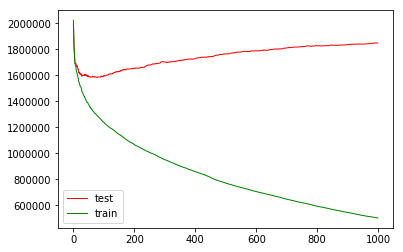

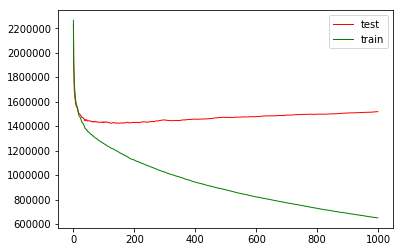

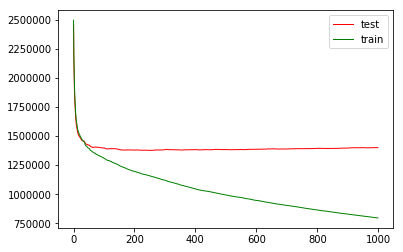

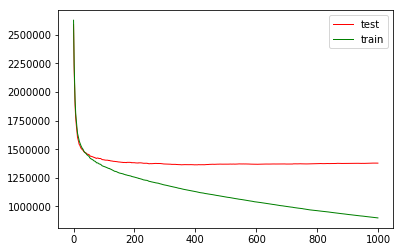

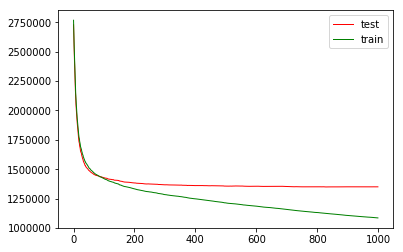

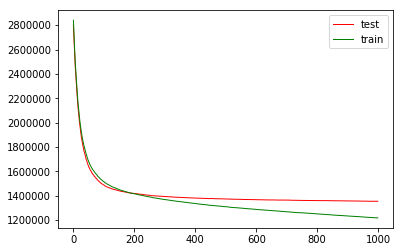

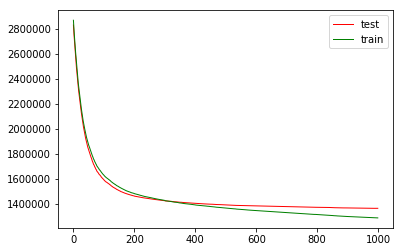

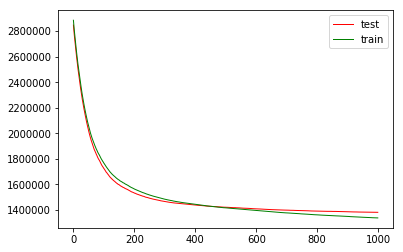

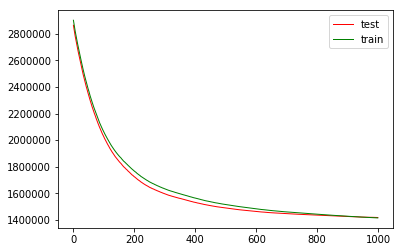

In [572]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
% matplotlib inline

def calc_loss(estimator, X, y_true):
    loss = []
    y_staged = estimator.staged_predict(X)
    for y_pred in y_staged:
        loss.append(mean_absolute_error(y_true, y_pred))
    return loss

opt_params = {}
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, shuffle = True, random_state = 42)
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.03, 0.02, 0.01]:
    print('Learning rate', learning_rate)
    gbr = GradientBoostingRegressor(random_state = 42, n_estimators = 1000, learning_rate = learning_rate)
    gbr.fit(X = X_train_split, y = y_train_split)
    train_loss = calc_loss(gbr, X_train_split, y_train_split)
    test_loss = calc_loss(gbr, X_test_split, y_test_split)
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=1)
    plt.plot(train_loss, 'g', linewidth=1)
    plt.legend(['test', 'train'])
    opt_params[learning_rate] = [test_loss.index(min(test_loss)), min(test_loss)]    
    print('Min loss at', test_loss.index(min(test_loss)), 'iteration')
    
print('Optimum:\n', opt_params)